In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [32]:
data_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(data_path)
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [33]:
# Summary statistics
df.info()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Preview basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Missing values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [5]:
#Headline Analysis

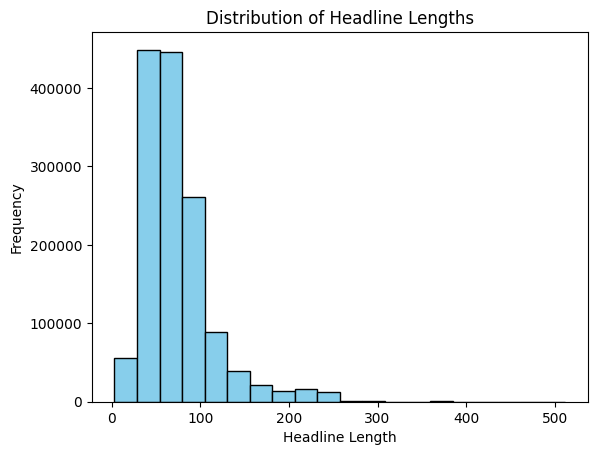

In [6]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Plot headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()

In [7]:
print(df['date'].head())
print(df['date'].dtype)

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
object


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


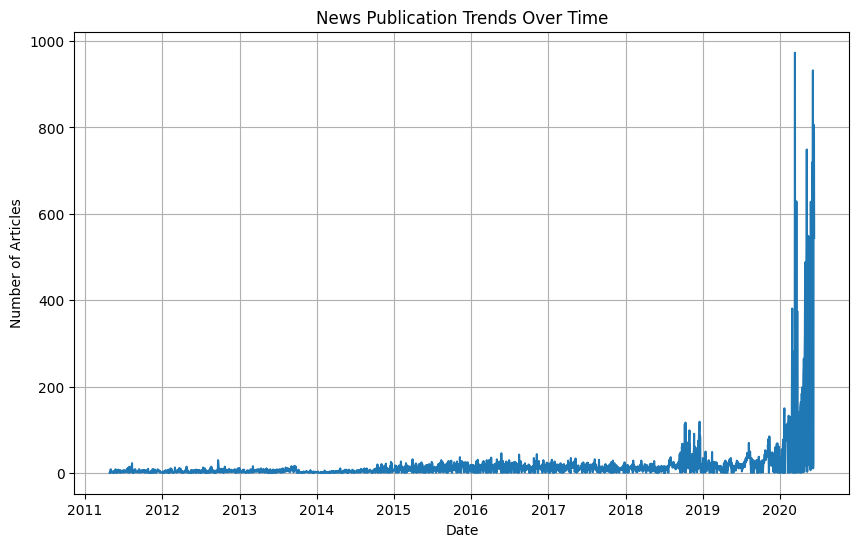

In [9]:
df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('News Publication Trends Over Time')
plt.grid()
plt.show()

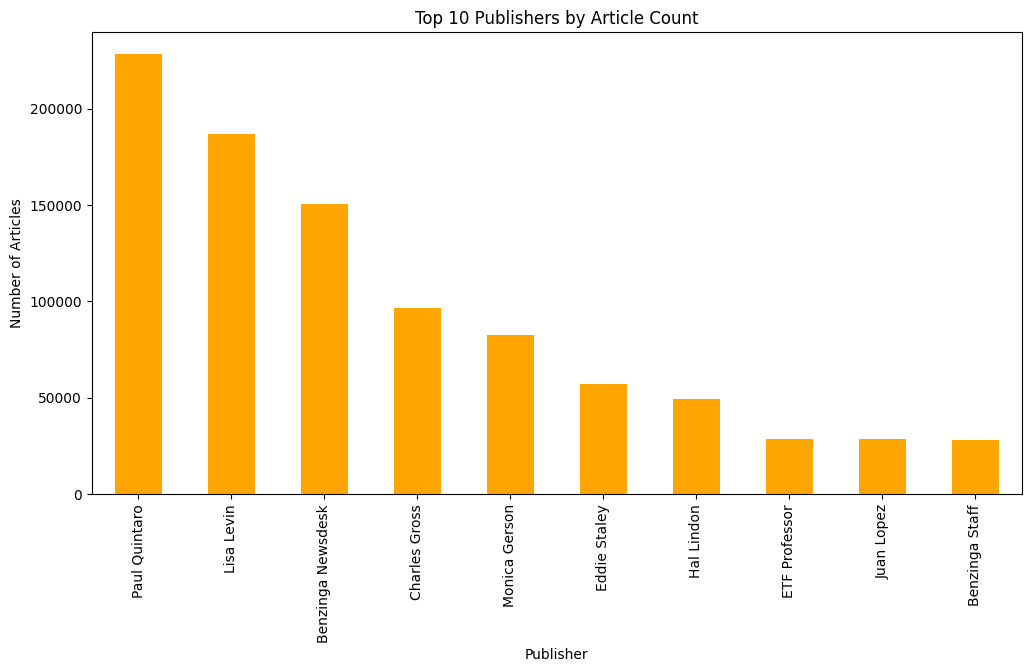

In [10]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [11]:
print(df['publisher'].value_counts())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [12]:
#Text Analysis (Sentiment)


In [13]:
from textblob import TextBlob

df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['headline', 'sentiment']].head(20))

                                             headline  sentiment
0             Stocks That Hit 52-Week Highs On Friday       0.00
1          Stocks That Hit 52-Week Highs On Wednesday       0.00
2                       71 Biggest Movers From Friday       0.00
3        46 Stocks Moving In Friday's Mid-Day Session       0.00
4   B of A Securities Maintains Neutral on Agilent...       0.00
5   CFRA Maintains Hold on Agilent Technologies, L...       0.00
6   UBS Maintains Neutral on Agilent Technologies,...       0.00
7   Agilent Technologies shares are trading higher...       0.25
8   Wells Fargo Maintains Overweight on Agilent Te...       0.00
9          10 Biggest Price Target Changes For Friday       0.00
10    30 Stocks Moving in Friday's Pre-Market Session       0.00
11  SVB Leerink Maintains Outperform on Agilent Te...       0.00
12  8 Stocks Moving In Thursday's After-Hours Session       0.00
13  Agilent Technologies shares are trading higher...       0.25
14  Agilent Technologies 

sentiment
Neutral     934928
Positive    341161
Negative    131239
Name: count, dtype: int64


Text(0, 0.5, 'Number of Headlines')

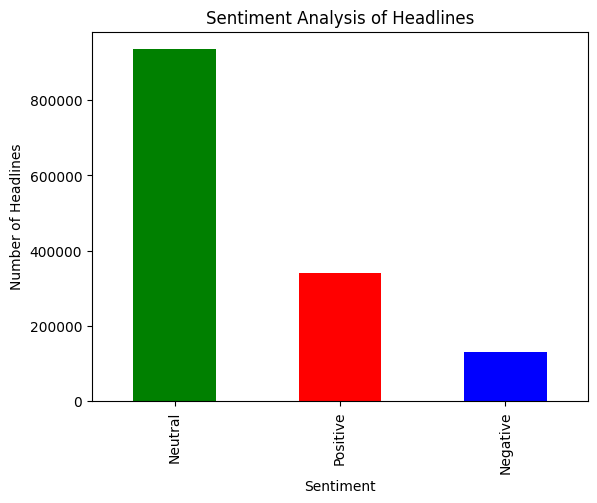

In [14]:
# Define a function to calculate sentiment
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis
df['sentiment'] = df['headline'].apply(get_sentiment)

# Count sentiment categories
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment analysis results
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Analysis of Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")


In [22]:
import pandas as pd
import talib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stock price data (make sure path is correct)
stock_data_path = "../data/GOOG_historical_data.csv"
df_stock = pd.read_csv(stock_data_path)

# Convert the 'Date' column to datetime format
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Sort data by date
df_stock = df_stock.sort_values(by='Date')

# Display basic info
print(df_stock.head())
print(df_stock.info())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5020 non-null   datetime64[ns]
 1   Open          5020 non-null   float64       
 2   High          5020 non-null   float64       
 

In [23]:
# Calculate daily percentage returns
df_stock['Daily_Return'] = df_stock['Close'].pct_change()

# Print summary statistics for daily returns
print("Summary of Daily Returns:")
print(df_stock['Daily_Return'].describe())


Summary of Daily Returns:
count    5019.000000
mean        0.001029
std         0.019318
min        -0.116091
25%        -0.007854
50%         0.000802
75%         0.010138
max         0.199915
Name: Daily_Return, dtype: float64


In [32]:
# Convert 'Close' column to a NumPy array for TA-Lib functions
close_prices = df_stock['Close'].to_numpy()

# Calculate Simple Moving Average (SMA) over 20 days
df_stock['SMA_20'] = talib.SMA(close_prices, timeperiod=20)

# Calculate Relative Strength Index (RSI)
df_stock['RSI'] = talib.RSI(close_prices, timeperiod=14)

# Calculate Moving Average Convergence Divergence (MACD)
df_stock['MACD'], df_stock['MACD_signal'], df_stock['MACD_hist'] = talib.MACD(
    close_prices, fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the calculated indicators
print(df_stock[['Date', 'Close', 'SMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head())
print(df_stock[['Date', 'Close', 'SMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].tail())


        Date     Close  SMA_20  RSI  MACD  MACD_signal  MACD_hist
0 2004-08-19  2.499133     NaN  NaN   NaN          NaN        NaN
1 2004-08-20  2.697639     NaN  NaN   NaN          NaN        NaN
2 2004-08-23  2.724787     NaN  NaN   NaN          NaN        NaN
3 2004-08-24  2.611960     NaN  NaN   NaN          NaN        NaN
4 2004-08-25  2.640104     NaN  NaN   NaN          NaN        NaN
           Date       Close      SMA_20        RSI      MACD  MACD_signal  \
5015 2024-07-24  174.369995  185.500001  37.434718 -0.034166     1.571016   
5016 2024-07-25  169.160004  184.689501  32.279082 -1.106693     1.035474   
5017 2024-07-26  168.679993  183.780501  31.843937 -1.972672     0.433845   
5018 2024-07-29  171.130005  183.166001  36.545844 -2.433223    -0.139569   
5019 2024-07-30  171.860001  182.534501  37.920068 -2.708091    -0.653273   

      MACD_hist  
5015  -1.605182  
5016  -2.142167  
5017  -2.406517  
5018  -2.293654  
5019  -2.054818  


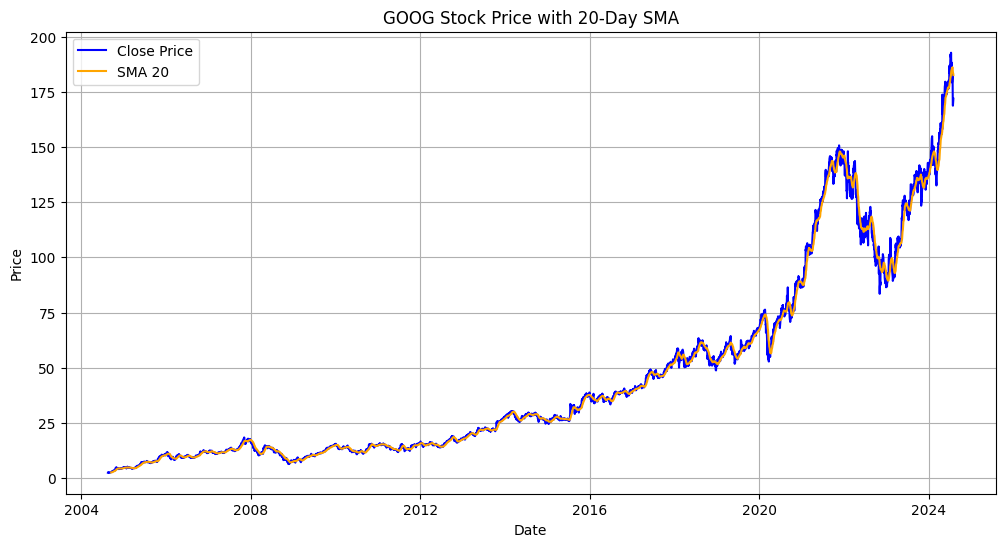

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Date'], df_stock['Close'], label='Close Price', color='blue')
plt.plot(df_stock['Date'], df_stock['SMA_20'], label='SMA 20', color='orange')
plt.title('GOOG Stock Price with 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


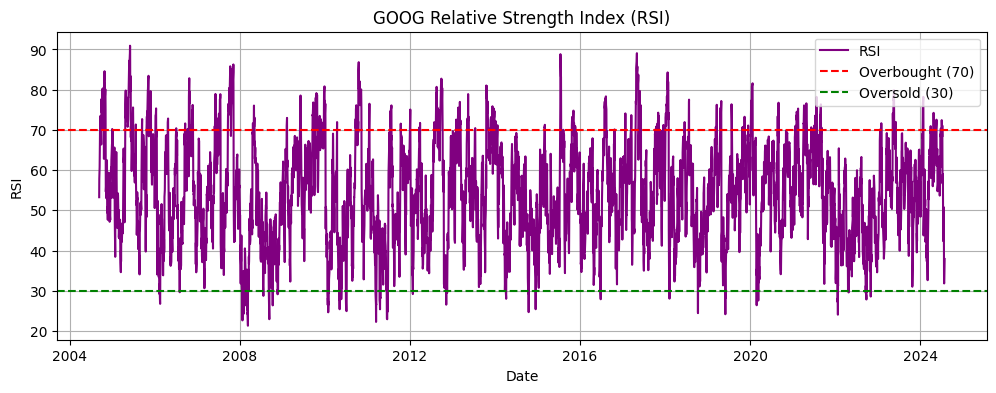

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(df_stock['Date'], df_stock['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('GOOG Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()


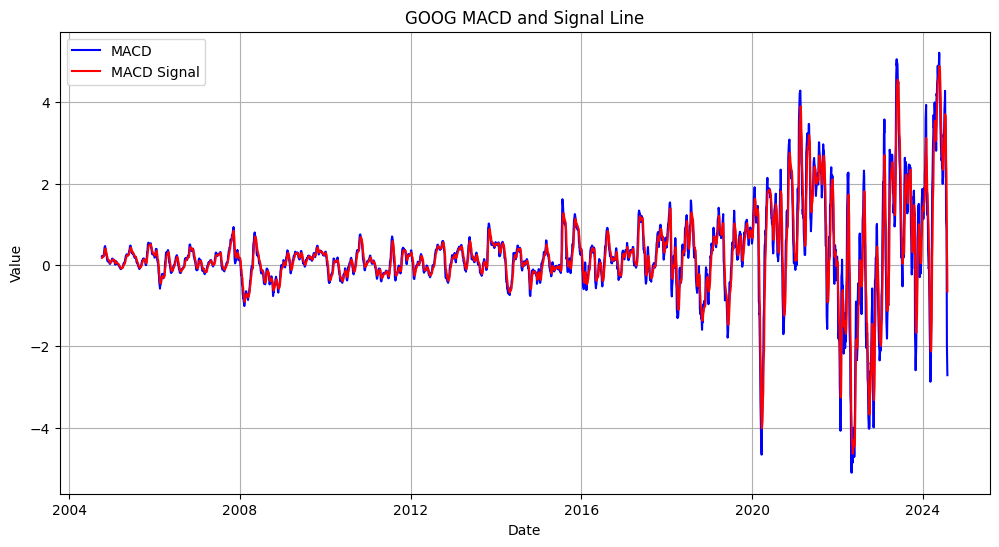

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Date'], df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock['Date'], df_stock['MACD_signal'], label='MACD Signal', color='red')
plt.title('GOOG MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


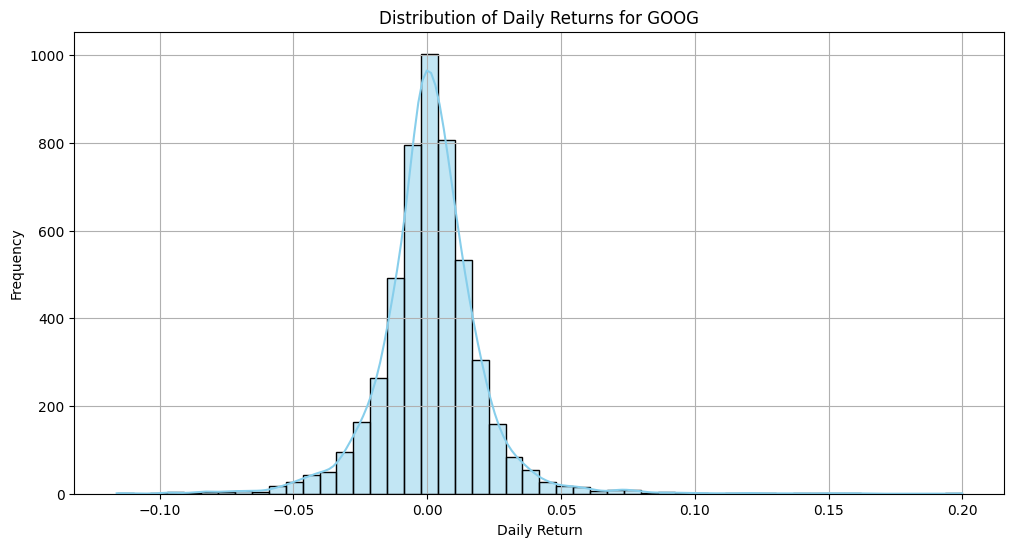

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df_stock['Daily_Return'].dropna(), bins=50, color='skyblue', kde=True)
plt.title('Distribution of Daily Returns for GOOG')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()
